In [1]:
import numpy as np         # for linear algebra
import pandas as pd        # for data processing, I/O csv file (to read write the data)
import seaborn as sns      
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('C:\\Users\\admin\\test\\train.csv')

test = pd.read_csv('C:\\Users\\admin\\test\\test.csv')

gender_submission = pd.read_csv('C:\\Users\\admin\\test\\gender_submission.csv')

In [3]:
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## It's pretty useless if we run Ml algorithms without literally understanding the data, so here we goes data visualization.

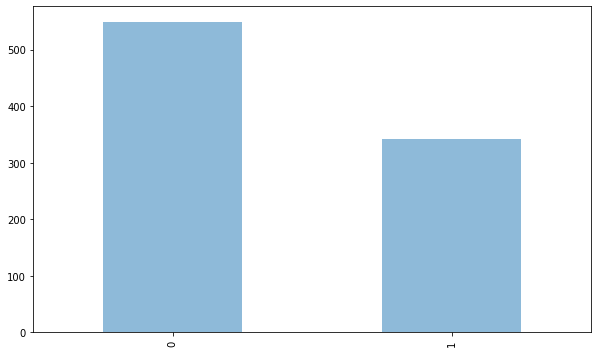

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
titanic['Survived'].value_counts().plot(kind='bar', alpha=0.5)  #'Survived' is dependent/target variable.

###
We can obviously see that approximate of 350 people survived and 550 people died, we can use normalization technique inorder to view concreate percentages.

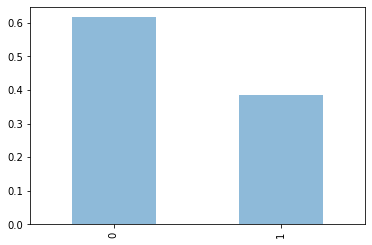

In [18]:
titanic.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

### 
So from here we can see 40% people survived and 60% of people died.

###
Now, Since we have all age of the passengers, we can see the relationship between age and survival rate. Here as we gonna plot two different attributes scatter plot will do

Text(0.5, 1.0, 'Survived w.r.t Age')

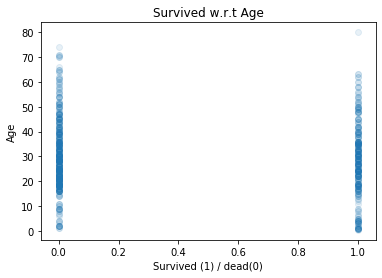

In [33]:
plt.scatter(x=titanic['Survived'], y=titanic['Age'], alpha=0.1)
plt.xlabel("Survived (1) / dead(0)")
plt.ylabel("Age")
plt.title("Survived w.r.t Age")


###So From the below we can understand that, some of the older people died (between 50-70) and some of the younger 
#  people (between 20-40) survived more.

###
Lets have a look at the counts plot of passenger class.

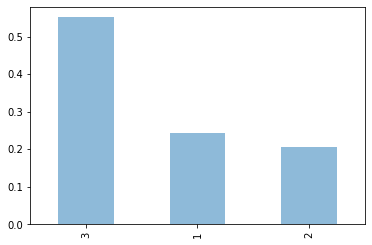

In [34]:
titanic.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

##So From the below graph, we infered that 55% of people are from 3rd class and 25% and 20% from the rest.

###
There are actually 2 plots that are pretty cool to use if we wanna find correlation between two different features. one is scatter plot which we seen above and another one is KDE (Kernal Desnsity estimation). Let's correlate passenger class with passengers age.

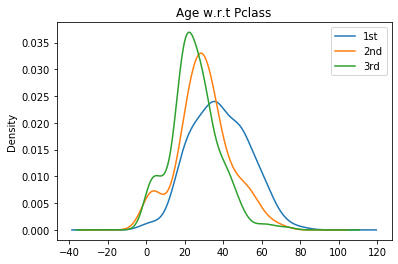

In [42]:
for x in [1,2,3]:                       #for 3 classes
    titanic.Age[titanic.Pclass == x].plot(kind='kde')
    plt.title('Age w.r.t Pclass')
    plt.legend(('1st','2nd','3rd'))
    
    
###From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious. 

###
Atlast lets plot embarked feature.    

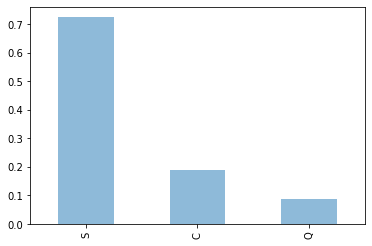

In [44]:
titanic.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F46C453C8>,
      dtype=object)

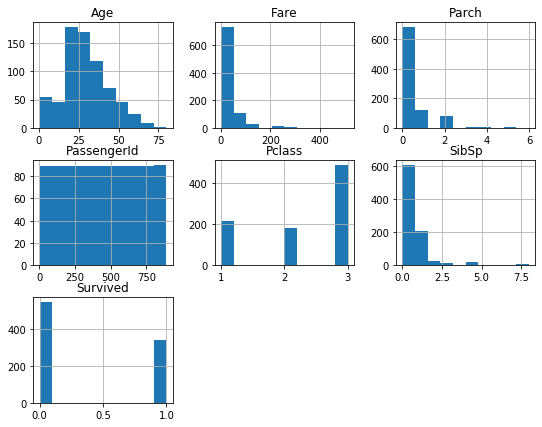

In [45]:
titanic.hist(bins=10, figsize=(9,7), grid=True)

###
we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

In [59]:
def titanic_barchart(feature):
    g = sns.FacetGrid(titanic, col='Sex', row='Survived' , margin_titles=True)
    g.map(plt.hist, feature, color='purple' )

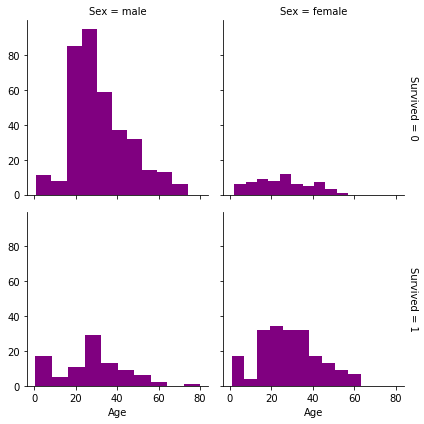

In [60]:
titanic_barchart('Age')

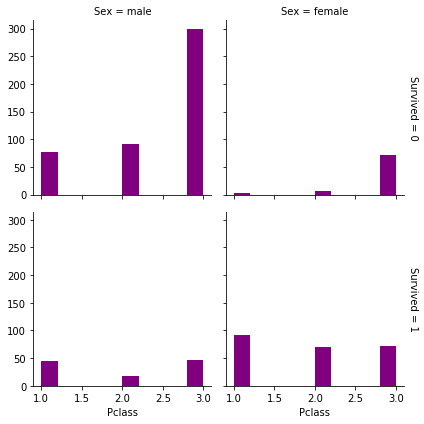

In [61]:
titanic_barchart('Pclass')

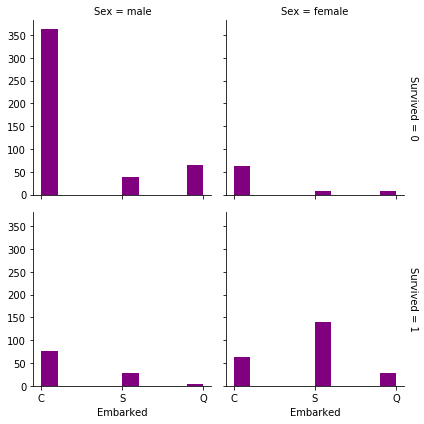

In [62]:
titanic_barchart('Embarked')

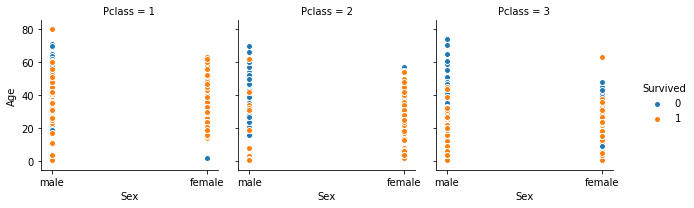

In [68]:
g = sns.FacetGrid(titanic, hue='Survived', col='Pclass', margin_titles=True)
g.map(plt.scatter, 'Sex', 'Age', edgecolor='w').add_legend()

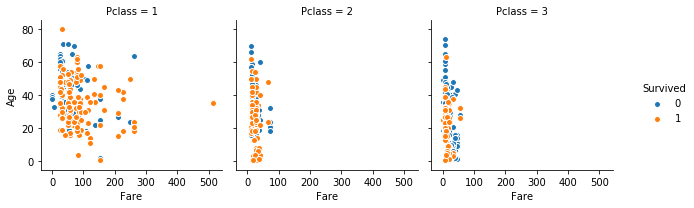

In [69]:
g = sns.FacetGrid(titanic, hue='Survived', col='Pclass', margin_titles=True)
g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

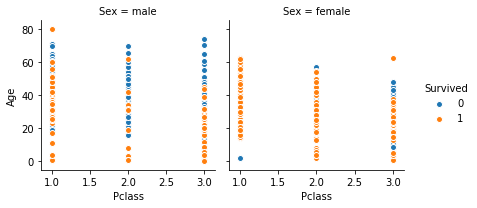

In [70]:
g = sns.FacetGrid(titanic, hue='Survived', col='Sex', margin_titles=True)
g.map(plt.scatter, 'Pclass', 'Age', edgecolor='w').add_legend()

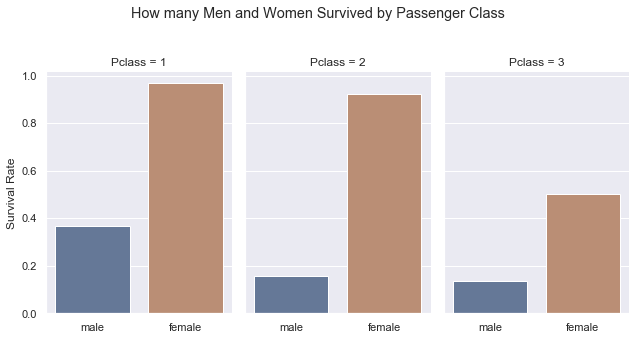

In [73]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
g.set_axis_labels("", "Survival Rate")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

Text(0.5, 1.0, 'Survival by Age')

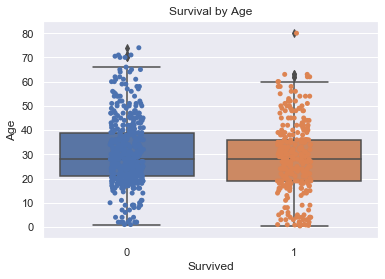

In [76]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12)

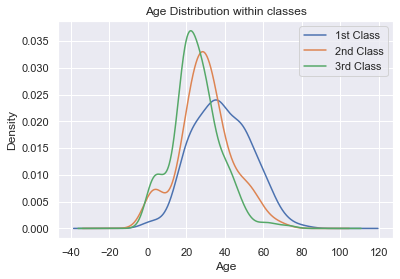

In [77]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

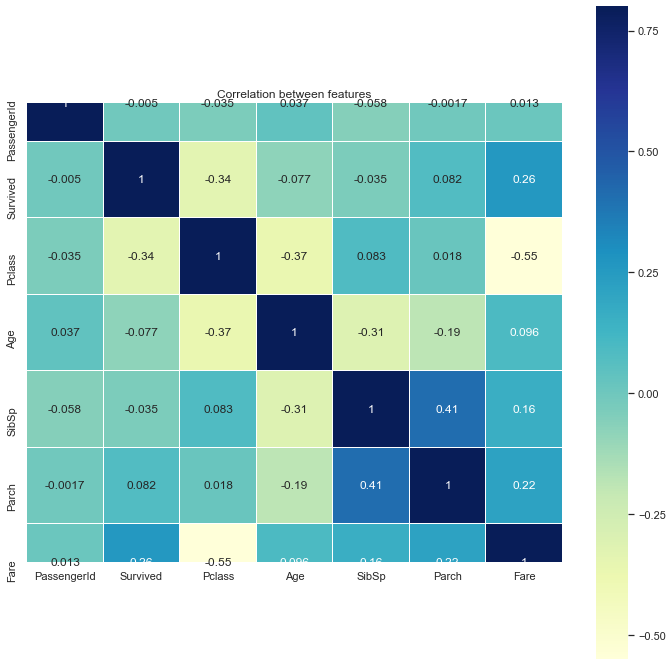

In [83]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(12, 12))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [84]:
#correlation of features with target variable
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64